# TP Python

In [1]:
pip install matplotlib

  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
#import
import math
import random
import matplotlib.pyplot as plt
import numpy as np

## Exercice 1

1) Ecrire une fonction `bernoulli(p)` qui retourne une réalisation d'une variable de Bernoulli de paramètre p à partir de la comande `random()`

In [3]:
def bernoulli(p):
    return 1 if p >= random.random() else 0

bernoulli(0.5)
        

1

2) Ecrire une fonction `liste_bernoulli(n,p)` qui retourne une liste avec n réalisations d'une variable de Bernoulli de paramètre p.

In [4]:
def liste_bernoulli(n,p):
    liste = []
    for i in range(n):
        liste.append(bernoulli(p))
    return liste

liste_bernoulli(10,0.5)

[0, 0, 1, 1, 0, 0, 0, 1, 1, 0]

3) Ecrire une fonction `frequence_bernoulli(n,p)` qui calcule la fréquence empirique de succès d'une variable de Bernoulli de paramètre p sur n réalisations.

In [5]:
def frequence_bernoulli(n,p):
    return (liste_bernoulli(n,p).count(1))/n

frequence_bernoulli(2000,0.5)

0.4865

4) Proposer une fonction `binomiale(n,p)` pour créer une variable aléatoire binomiale de paramètre(n,p).

In [6]:
def binomiale(n,p):
    return (liste_bernoulli(n,p).count(1))

binomiale(2000,0.5)

1019

5) Réaliser un histogramme sur un grand nombre m de réalisations de cette variable
binomiale avec la commande l’histogramme de ces réalisations avec la commande
hist de la bibliothèque `matplotlib.pyplot` que l’on chargera préalablement
avec la commande import `matplotlib.pyplot` (Ou import `matplotlib.pyplot` as `plt` si
on veut avoir `plt` (ou autre chose) comme raccourci).

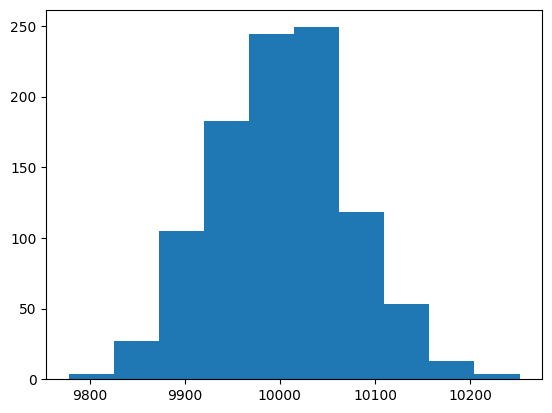

In [7]:
def histo(m,n,p):
    liste = []
    for i in range (m):
        liste.append(binomiale(n,p))
    plt.hist(liste)
    plt.show()

histo(1000,20000,0.5)


## Exercice 2 - Monty Hall

1) Écrire une fonction `strategie_conserve()` qui retourne l’issue aléatoire d’une ex-
périence où l’on conserve la porte choisie à la première étape. Le résultat sera 1 si
l’expérience est gagnante et 0 sinon.

In [8]:
def strategie_conserve():
    portes = [0,1,2]
    voiture = random.randint(0,2)
    choix = random.randint(0,2)
    porteChevre = random.randint(0,2);
    while porteChevre != voiture and porteChevre != choix:
        porteChevre = random.randint(0,2)
    return 1 if choix == voiture else 0

strategie_conserve()

1

2) Écrire une fonction `strategie_change()` qui retourne l’issue aléatoire d’une ex-
périence où l’on change la porte choisie à la première étape. Le résultat sera 1 si
l’expérience est gagnante et 0 sinon.

In [9]:
def strategie_change():
    portes = [0,1,2]
    voiture = random.randint(0,2)
    choix = random.randint(0,2)
    premierChoix = choix
    porteChevre = random.randint(0,2);
    while porteChevre == voiture or porteChevre == choix:
        porteChevre = random.randint(0,2)
    while choix  == porteChevre or choix == premierChoix:
        choix = random.randint(0,2)
    return 1 if choix == voiture else 0

strategie_change()

1

3) Écrire une fonction `frequence_conserve(n)` qui retourne la fréquence de gain
pour n réalisation de la stratégie où l’on conserve la porte choisie à la première
étape

In [10]:
def frequence_conserve(n):
    total = 0
    for i in range (n): 
        if strategie_conserve() == 1:
            total += 1
    return total/n
frequence_conserve(2000)

0.3235

4) Écrire une fonction `frequence_change(n)` qui retourne la fréquence de gain pour
n réalisation de la stratégie où l’on change la porte choisie à la première étape.

In [11]:
def frequence_change(n):
    total = 0
    for i in range (n): 
        if strategie_change() == 1:
            total += 1
    return total/n
frequence_change(2000)

0.66

5) Comparer les résultats pour un grand nombre n de réalisations de l’expérience avec
le résultat obtenu en théorie.

On peut observer que dans la situation ou l'on change la probabilité d'avoir la voiture est d'environ 2/3 alors que si l'on reste sur la meme porte la probabilité est de 1/3

## Exercice 3 - Simulation de variable exponentielle

1) Montrer que la fonction de répartition de Y est f , c’est-à-dire que P(Y ≤ x) = f (x)
pour tout x ∈ R

$$
F_Y(x) = P(Y \leq x)
$$
$$
= P(F^{-1}(X) \leq x)
$$
$$
= P(X \leq F(x))
$$
</p>
<p>(car \( X \) suit une loi uniforme sur \([0,1]\))</p>
<p>
$$
= F(x)
$$

2) Si f est la fonction de répartition d’une variable aléatoire exponentielle alors F−1(x) =
− ln(x−1)
λ pour tout x ∈ [0, 1].

3) Écrire la fonction exponentielle(λ).

In [106]:
def exponentielle(L):
    x= random.random()
    return -math.log(1-x)/L

exponentielle(1)

0.15967827503839707

4) Réaliser un grand nombre n de réalisations (par exemple n = 10000) de cette va-
riable pour un λ fixé (par exemple λ = .1) puis tracer l’histogramme de ces réali-
sations avec la commande hist de la bibliothèque matplotlib.pyplot Comme
précédemment.
Cet histogramme donnera une densité empirique (multipliée par n) que l’on
comparera avec la vraie densité obtenue avec la commande plot de matplotlib
On obtiendra un graphique du type de la Figure 1.

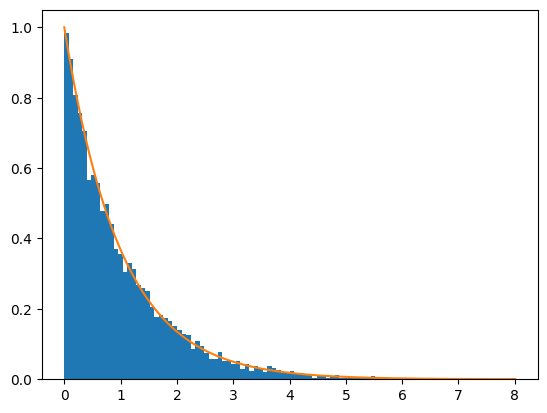

In [ ]:
def histoExp(n,L):

    liste = []
    for j in range(n):
        liste.append(exponentielle(L))
    plt.hist(liste, bins=100, density=True)
    x = np.linspace(0, max(liste), n)#fait un nombre de point suffisant pour que la courbe ressemble a une courbe
    y = L * np.exp(-L * x)#multiplication de lambda fois lexp de chaque point de laxe x multiplier par -lambda
    plt.plot(x,y)
    plt.show()

histoExp(10000,1)


## Exercice 4

1) Tirer n (par exemple n = 100 ou 1000) points au hasard dans le carré [0, 1]2. Les
coordonnées (x, y) de ces points suivront des variables aléatoires uniformes sur
[0, 1].

In [109]:
def tirage(n):
    y = []
    x = []
    for i in range(n):
        y.append(random.random())
        x.append(random.random())
    return [x,y]

coord = tirage(5)
print(coord[0])
print(coord[1])


[0.8695587008390372, 0.005896188112954115, 0.16286111196436703, 0.14590789247198943, 0.7778505814620555]
[0.0844306534225554, 0.5089117797948725, 0.4172685304971977, 0.11458874200179059, 0.8483872863055516]


2) Afficher avec les commandes scatter et plot de la bibliothèque matplotlib ces n
tirages ansi que le quart d’arc de cercle dans ce carré.

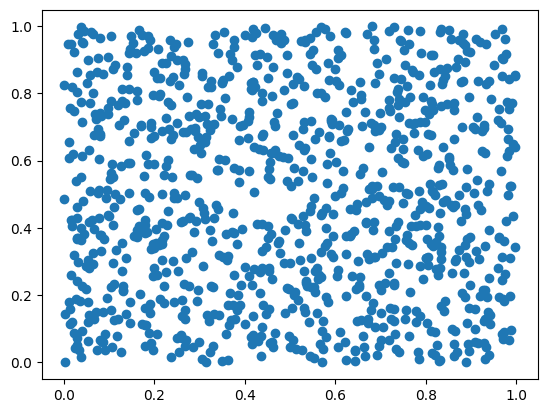

In [ ]:

coord = tirage(1000)
plt.scatter(coord[0],coord[1])
plt.plot()

(3) Calculer la proportion de points à l’intérieur du carré et retourner une approxima-
tion de π. On utilisera que les points (x, y) à l’intérieur du disque satisfont l’inéga-
lité x2 + y2 < 1.

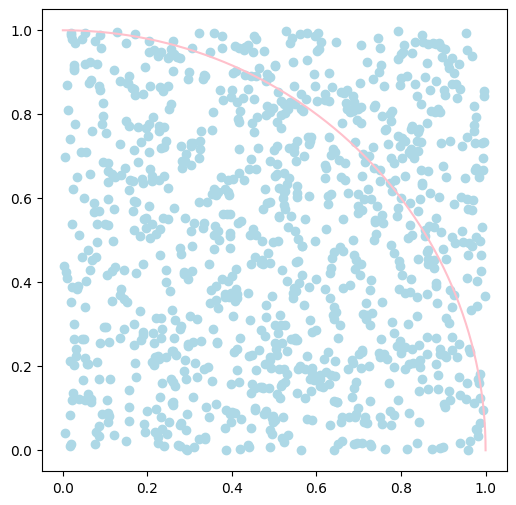

Approximation de π avec 1000 tirages : 3.144


In [135]:
def app(n):
    x, y = tirage(n)
    
    inside_circle = [(x[i]**2 + y[i]**2) < 1 for i in range(n)]
    countInside = sum(inside_circle)
    
    piApprox = 4 * countInside / n
    
    plt.figure(figsize=(6, 6))
    plt.scatter(x, y,color="lightblue")
    
    theta = np.linspace(0, np.pi / 2, 1000)
    plt.plot(np.cos(theta), np.sin(theta),color = "pink")
    plt.show()
    
    return piApprox

n = 1000
piEstime = app(n)
print(f"Approximation de π avec {n} tirages : {piEstime}")